## Приоритезация гипотез и A/B - тестирование

### Описание:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

### Задачи:
- Приоритизировать гипотезы;
- Запустить A/B-тест и проанализируйте результаты.

### Описание данных:

Данные для первой части:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ;
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### Импорт всех необходимых библиотек

In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings  

# добавляем код для игнорирования ошибок при визуализации
warnings.filterwarnings("ignore") 

### Часть 1. Приоритизация гипотез

In [2]:
# записываем данные в переменную
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# первичная проверка
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# применим фреймворк ICE для приоретизации гипотез
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],1)

pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  

# отсортируем по ICE
hypothesis.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


По критерию 'ICE' получены следующие результаты:
- Акция, дающая скидку на день рождения оказалась на первом месте с показателем 16.2 за счет большого влияния с высокой степенью уверенности и средней сложностью внедрения;
- Добавление двух новых каналов привлечения трафика оказались на втором месте с показателем 13.3 за счет потенциально высокого влияния с высокой степенью уверенность и сложностью внедрения чуть выше среднего;
- Идея добавления подписки на все основные страницы для сбора базы для рассылок набрала 11.2 балла за счет высокой уверенности в результатах при средней сложности внедрения.

In [4]:
# применим фреймворк RICE для приоретизации гипотез
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

# отсортируем по RICE
hypothesis = hypothesis.sort_values(['RICE', 'ICE'], ascending=False)
hypothesis

# построим аналог тепловой карты, где в каждом столбце выделим лучшие значения
cm = sns.light_palette("green", as_cmap=True)
s = hypothesis.style.background_gradient(cmap=cm)
s


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


По критерию 'RICE' получены следующие результаты:
- Идея добавления подписки на все основные страницы для сбора базы для рассылок за счет критерия Reach вырвалась на первую строчку, так как затронет всех пользователей;
- Добавление блоков рекомендаций для повышения среднего чека хоть и является трудоемким и с ожидаемым средним эффектом, но это изменение затронет большую часть пользователей, что в итоге должно принести необходимый эффект;
- Добавление двух новых каналов привлечения трафика оказалось на третьем месте вместо второго по критерию 'ICE' за счет низкого показателя критерия Reach - несмотря на неплохие остальные показатели, само изменение не затронет большое количество пользователей.




#### Комментарии и советы, какие гипотезы взять в работу:
Так как ресурсы компании ограничены, рекомендуется взять в работу следующие гипотезы:

- Гипотеза о добавлении форм подписок на все основные страницы оказалась лучшей по фреймворку RICE и третьей по фреймворку ICE, так что её однозначно стоит рассмотреть;
- Добавление блоков рекомендаций оказались вторыми по RICE и пятыми по ICE, и при относительной простоте исполнения могут дать вполне ощутимый прирост в размере среднего чека, так что тоже стоит рассмотреть;
- По критерию RICE третье место заняли сразу 2 гипотезы, но у гипотезы о внедрении новых источников привлечения лучший показатель по критерию ICE из этих двух, так что возьмем её в работу.

## Часть 2. Анализ A/B-теста

### Предобработка данных

In [5]:
# запишем необходимые данные в датафреймы
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
# проверим корректность данных
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

#### Метод info дал следующие результаты:
- В данных нет пропусков;
- Необходимо заменить тип данных в столбцах с датой, все остальные данные соответствуют своим типам.

In [7]:
# применяем метод astype
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

In [8]:
# проверяем на дубликаты
display(orders.duplicated().value_counts())
display(visitors.duplicated().value_counts())

False    1197
dtype: int64

False    62
dtype: int64

In [9]:
# оценим временной промежуток, за который приведены данные
display(orders['date'].min(),
        orders['date'].max(),
        visitors['date'].min(),
        visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Данные приведены за август 2019 года - временные диапазоны двух таблиц сопоставимы.

In [10]:
# проверим, попали ли некоторые пользователи в обе исследуемые группы
check = orders.groupby(['visitorId', 'group'])['revenue'].sum().reset_index()
check = check['visitorId'].value_counts().reset_index()
check[check['visitorId'] > 1].shape

(58, 2)

58 пользователей попали в обе исследуемые группы - значит сбор данных осуществлялся с предположением о том, что все изменения не оставят в сознании пользователей долгосрочные сигналы - скорее всего этот интернет-магазин продает какие-то частоиспользуемые товары (доставка еды на дом, например), а не которые пользователь долго выбирает и потом долго использует (машины, например). 

In [11]:
# посмотрим медианный чек
orders['revenue'].median()

2978.0

Медианный чек составил около 3 тысяч рублей - гипотеза, что скорее всего магазин продает часто используемые товары, не опровергается. 

### Расчет и анализ кумулятивных метрик

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

# считаем кумулятивную выручку
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# считаем кумулятивное количество пользователей
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем датафреймы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

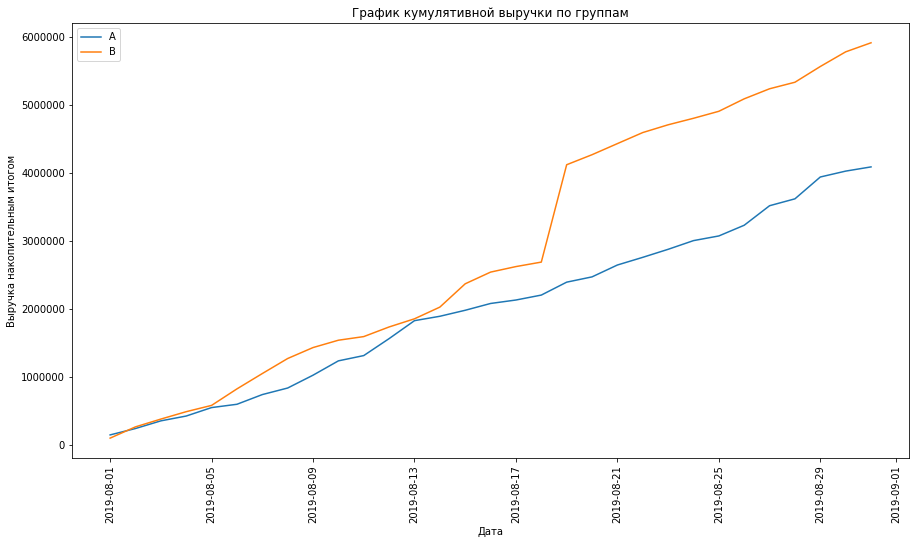

In [13]:
# визуализируем 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка накопительным итогом')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Выручка группы B стабильно лучше аналогичной в группе А. В районе 18 августа наблюдается резкий всплеск выручки в группе В, что только укрепляет её доминирующее положение.

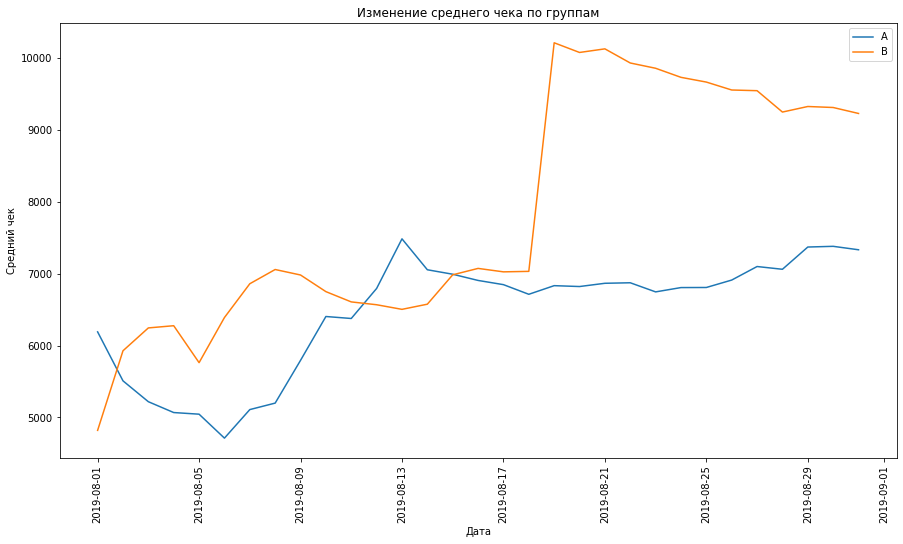

In [14]:
# оценим изменение среднего чека по группам
plt.figure(figsize=(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90)
plt.title('Изменение среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Аналогичная ситуация: в районе 18 августа наблюдается резкий всплеск. Могу предположить, что в этот день был осуществлен необычайно дорогой заказ.

Без учета этого всплеска сложно выделить фаворита по показателб средней выручки, так как до всплеска ситуация изменялась изо дня в день.

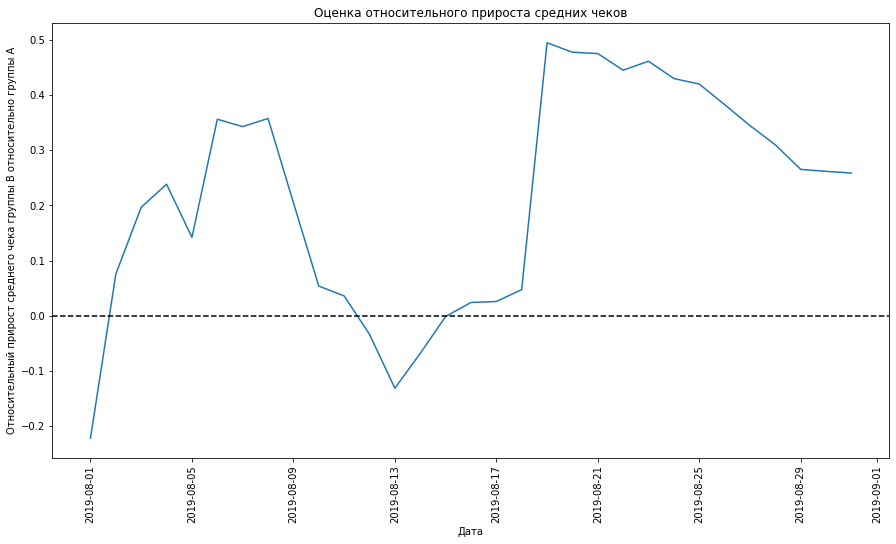

In [15]:
# построим график относительного изменения для среднего чека
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
# изменяем размер графика
plt.figure(figsize=(15,8))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# для большей наглядности повернем отображение дат
plt.xticks(rotation=90)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

# немного красоты 
plt.title('Оценка относительного прироста средних чеков')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост среднего чека группы B относительно группы A')

# показываем график
plt.show()

И опять очевидно заметен всплеск в районе 18 августа! Уверен, что при итоговом очищении данных мы отбросим покупку, которая так сильно исказила результаты.

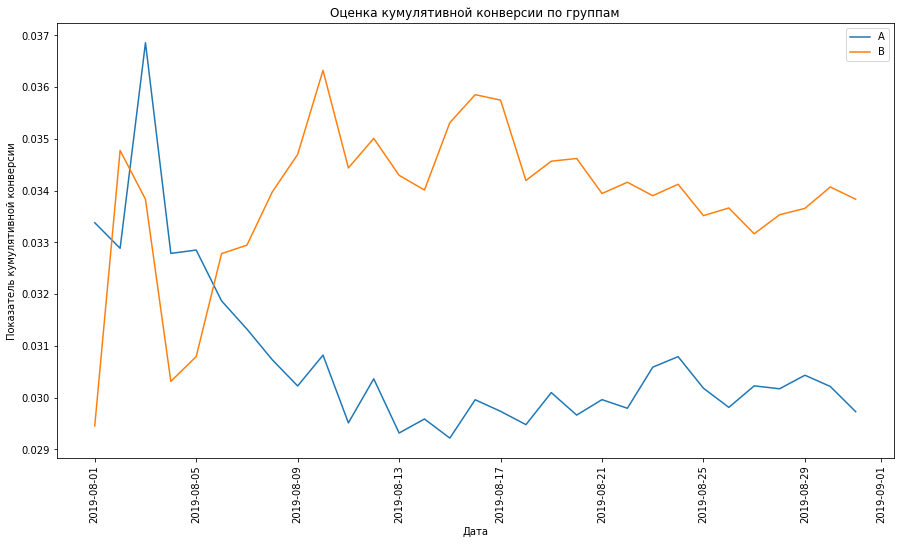

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A и B 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# визуализируем
plt.figure(figsize=(15,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=90)
plt.title('Оценка кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Показатель кумулятивной конверсии')
plt.legend()
plt.show()

А вот тут ситуация уже более однозначная - конверсия группы B уже практически в начале эксперимента зафиксировалась в доминирующем положении.

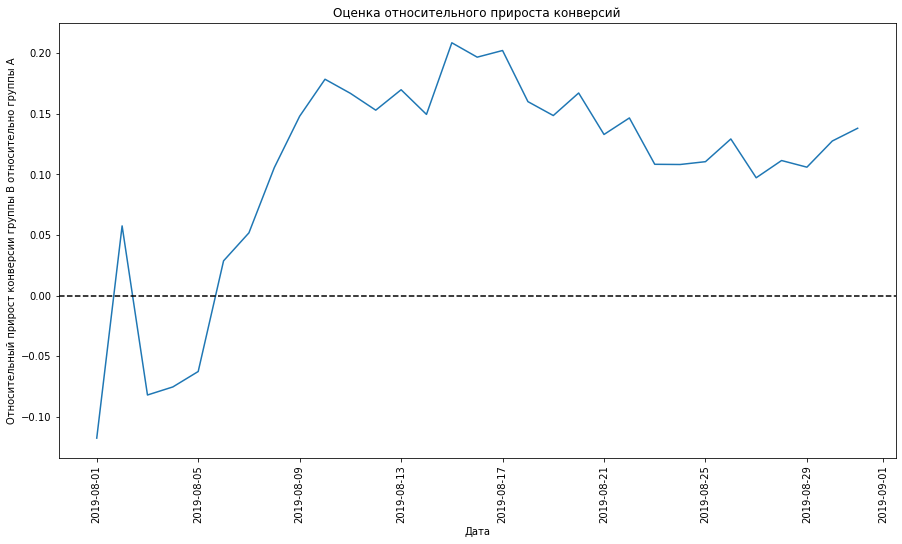

In [17]:
# построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(15,8))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=90)
plt.title('Оценка относительного прироста конверсий')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Ситуация аналогичная - уже практически в начале эксперимента конверсия группы B превысила аналогичный показатель группы А и зафиксировалась.

### Поиск и анализ аномалий в данных

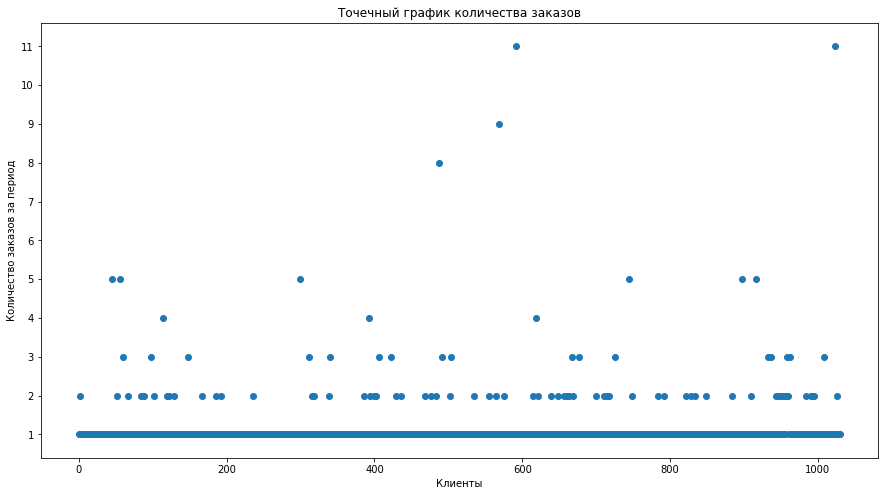

In [18]:
# построим точечный график количества заказов по клиентам
ordersbyusers = orders.groupby('visitorId').agg({'transactionId' : pd.Series.nunique}).reset_index()
ordersbyusers.columns = ['user_id', 'orders']

# визуализируем
x_values = pd.Series(range(0,len(ordersbyusers)))
plt.figure(figsize=(15,8))
plt.yticks(np.arange(0, 15, step=1))
plt.title('Точечный график количества заказов')
plt.xlabel('Клиенты')
plt.ylabel('Количество заказов за период')
plt.scatter(x_values, ordersbyusers['orders'])
plt.show()

Как мы видим по графику, подавляющее большинство людей совершают один заказ за данный период. Также довольно частое явление - 2 или 3 заказа, но вот остальное уже нельзя назвать типичной ситуацией.

In [19]:
# посчитаем 95 и 99 перцентили
np.percentile(ordersbyusers['orders'], [95, 99])

array([2., 4.])

Всего 1% клиентов сделали более 4 заказов за период - именно превышение этой границы мы определим как аномалию.

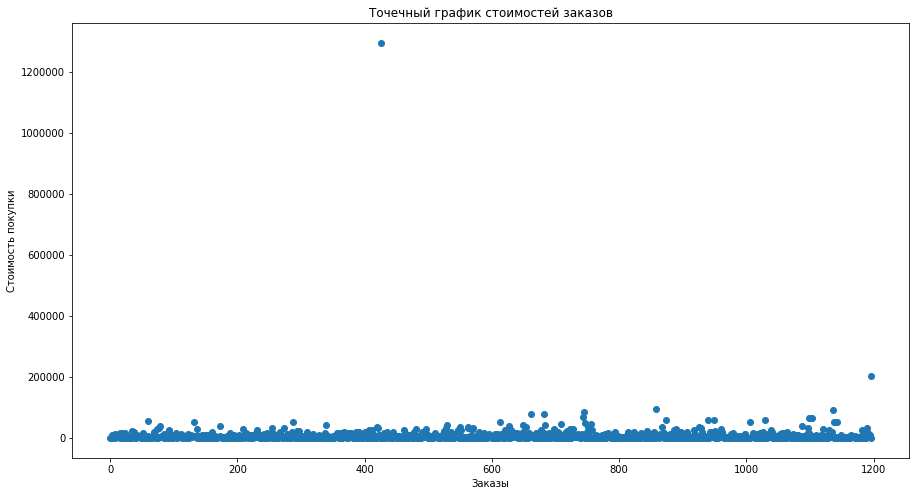

In [20]:
# оценим стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,8))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость покупки')
plt.scatter(x_values, orders['revenue'])
plt.show()

Ага, попался! Единственный заказ со стоимостью более 1.2 млн рублей - очевидная аномалия, которая исказила часть результатов.

In [21]:
# посчитаем 95 и 99 перцентили
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Будем считать аномалией заказы со стоимостью более 58233.2 рублей.

### Оценка статистической значимости полученных результатов исследования

In [22]:
# соберем необходимые данные в единый датафрейм
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                     .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

### Проверка гипотез

#### Конверсия
 1. Нулевая гипотеза: конверсия групп А и B не отличается;
 2. Альтернативня гипотеза: конверсия групп A и B отличается.
 
#### Средний чек
 1. Нулевая гипотеза: средний чек групп А и B не отличается;
 2. Альтернативня гипотеза: средний чек групп A и B отличается.
 
Проверка гипотез будет осуществляться в 2 итерациях - по "сырым" и очищенным данным.

In [23]:
# посчитаем статистическую значимость различий конверсии между группами по сырым данным
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0) 

print('p-value равен', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value равен 0.008
0.138


### Вывод:
- Значение p-value меньше 0.01, что даже при alpha = 0.01 означает, что между выборками есть статистическое различие (отвергается нулевая гипотеза об отсутствии статистически значимых различий).
- Корверсия группы B на более чем 13% превосходит аналогичный показатель группы А - значительное преимущество.

In [24]:
# рассчитаем статистическую значимость различий в средних чеках обоих групп по сырым данным
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


### Вывод:
- Значение p-value достаточно высокое даже для alpha = 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
- При этом средний чек группы B по данным исследования на 25.9% больше, чем средний чек группы А. Скорее всего, повлияла одна аномально большая покупка.

In [25]:
# для очистки данных создадим датафрейм с "аномальными" клиентами
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates()

# создадим отфильтрованные датафреймы для статистического анализа
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

# считаем статистическескую значимость
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.153


### Вывод:
- Значительных изменений по сравлению с "сырыми" данными - нет.
- Значение p-value также меньше 0.01, что даже при alpha = 0.01 означает, что между выборками есть статистическое различие (отвергается нулевая гипотеза об отсутствии статистически значимых различий).
- Корверсия группы B на более чем 15% превосходит аналогичный показатель группы А - еще более значительное преимущество.

In [26]:
# рассчитаем статистическую значимость различий в средних чеках обоих групп по очищенным данным
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.425
-0.006


### Вывод:
- P-value увеличился, что также свидетельствует об отсутствии статистически значимых различий;
- А вот разница средних чеков за счет очистки данных стала практически нулевой - даже немного в пользу группы А.

## Какие выводы по тесту можем сделать?

### Имеющиеся факты:
- Есть статистически значимые различия по конверсии между группами и по "сырым", и по очищенным данным. При этом данные указывают на превосходство группы B по этому показателю;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

### Вывод:
- Хоть A/B тестирование и не показало, что между группами есть статистически значимые различия в средних чеках, по конверсии статистически значимое различие наблюдается, и в этом показателей по данным исследования группа B значительно опережает группу А;
- Исходя из этого вывод: тест можно остановить, признав его успешным по критерию поиска лучшей конверсии, в которой побеждает группа B.






### Вывод по всей работе

#### В ходе реализации проекта получены следующие выводы и результаты:
##### Приоретизация гипотез
- Критерий Reach во фреймворке RICE значительно меняет результаты приоритезаций, однако это не означает, что он более точный, чем фреймворк ICE - выбор фреймворка зависит от конкретной компании, которая внедряет изменения;
- Для интернет-магазина критерий Reach является важным, поэтому гипотезы для проверки были выбраны по убыванию критерия RICE, а ICE послужил вспомотельным критерием для выбора последней гипотезы.

##### Анализ данных
- Анализ "сырых" данных показал, что кумулятивная выручка, средний чек и конверсия группы B значительно лучше аналогичных показателей группы А;
- Где-то в середине исследования наблюдается резкий скачек кумулятивной выручки и среднего чека группы B - был осуществлен аномально большой заказ суммой более 1.2 млн рублей, что при медианном чеке в 3 тыс. рублей является значительным отклонением;
- Было выяснено, что 99% покупателей совершают 4 и менее покупок в месяц, 99% покупок совершаются на сумму менее 58233.2 тыс. рублей.

##### Проверка статистической значимости
- И по "сырым" и по очищенным данным средний чек по разным группам не показал статистически значимых отклонений - значит не отвергается гипотеза о равенстве средних чеков;
- И по "сырым" и по очищенным данным конверсия исследуемых групп показала статистически значимые отклонения - значит есть основания отвергнуть нулевую гипотезу и признать, что конверсии исследуемых групп не равны. При этом по данным исследования было зафиксировано, что конверсия группы B значительно выше, поэтому было решено закончить тест и зафиксировать преимущество группы В.